目录

* [随机森林-分类任务](#随机森林-分类任务)
* [随机森林-特征重要性](#随机森林-特征重要性)
* [随机森林-回归任务](#随机森林-回归任务)

# 随机森林-分类任务
使用随机森林完成鸢尾花分类任务

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

iris = datasets.load_iris()
print(iris['data'].shape, iris['target'].shape) # (150, 4) (150,)
X = iris.data[:,[2,3]]
y = iris.target
print('Class labels:', np.unique(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, y_train.shape)

(150, 4) (150,)
Class labels: [0 1 2]
(105, 2) (105,)


训练，并绘制分类决策边界：

In [2]:

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
     # setup marker generator and color map
     markers = ('s', 'x', 'o', '^', 'v')
     colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
     cmap = ListedColormap(colors[:len(np.unique(y))])

     # plot the decision surface
     x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
     x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
     xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
     Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
     Z = Z.reshape(xx1.shape)
     plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
     plt.xlim(xx1.min(), xx1.max())
     plt.ylim(xx2.min(), xx2.max())

     for idx, cl in enumerate(np.unique(y)):
         plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
         alpha=0.8, c=colors[idx],
         marker=markers[idx], label=cl,
         edgecolor='black')

     # highlight test samples
     if test_idx:
         # plot all samples
         X_test, y_test = X[test_idx, :], y[test_idx]
         plt.scatter(X_test[:, 0], X_test[:, 1],
                     c='', edgecolor='black', alpha=1.0,
                     linewidth=1, marker='o',
                     s=100, label='test set')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


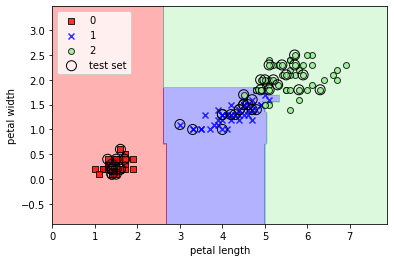

In [3]:
forest = RandomForestClassifier(criterion='gini', # 划分准则
								n_estimators=25, # 25个基学习器（决策树）
								random_state=1,
								n_jobs=2) # 并行执行
forest.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

# 随机森林-特征重要性
使用随机森林获得特征重要性

数据集：白酒数据，共有13个特征

使用RandomForestClassifier训练，然后调用feature_importances_属性获得特征重要性：

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

cwd = '/home/xijian/pycharm_projects/Magic-NLPer/MachineLearning/'
data_dir = cwd+'RandomForest随机森林/data/'

# Wine dataset and rank the 13 features by their respective importance measures
df_wine = pd.read_csv(data_dir+'wine.data',
                      header=None,
                      names=['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                               'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity',
                               'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
print('Class labels', np.unique(df_wine['Class label']))
print('numbers of features:', len(df_wine.keys())-1)
df_wine.head()

Class labels [1 2 3]
numbers of features: 13


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
# 划分训练集测试集
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
X_train.shape

(124, 13)

In [7]:
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=200, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
print(len(importances))
importances

13


array([0.11535953, 0.02485979, 0.01367936, 0.0206145 , 0.03254997,
       0.04019533, 0.18793917, 0.01096301, 0.02611948, 0.13488692,
       0.06345939, 0.13440744, 0.19496612])

In [8]:
"""
numpy.argsort(a, axis=-1, kind=’quicksort’, order=None)
功能: 将矩阵a在指定轴axis上排序，并返回排序后的下标
参数: a:输入矩阵， axis:需要排序的维度
返回值: 输出排序后的下标
"""
indices = np.argsort(importances)[::-1] # 取反后是从大到小
indices

array([12,  6,  9, 11,  0, 10,  5,  4,  8,  1,  3,  2,  7])

In [9]:
for i in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (i + 1, 30, feat_labels[indices[i]], importances[indices[i]]))

 1) Proline                        0.194966
 2) Flavanoids                     0.187939
 3) Color intensity                0.134887
 4) OD280/OD315 of diluted wines   0.134407
 5) Alcohol                        0.115360
 6) Hue                            0.063459
 7) Total phenols                  0.040195
 8) Magnesium                      0.032550
 9) Proanthocyanins                0.026119
10) Malic acid                     0.024860
11) Alcalinity of ash              0.020615
12) Ash                            0.013679
13) Nonflavanoid phenols           0.010963


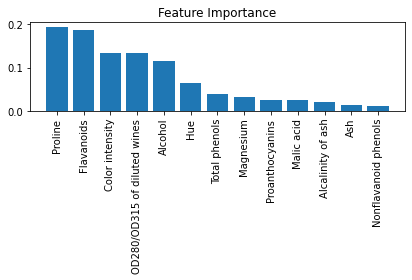

In [10]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# 随机森林-回归任务

数据集：房价预测

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_csv(data_dir+'housing.data.txt',
                 header=None,
                 sep='\s+',
                 names= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [13]:
# 划分数据集
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, y_train.shape)

(404, 13) (404,)


In [14]:
forest = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train) # 训练

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

MSE train: 1.237, test: 8.916
